## Problem 1: Creating trim trajectory calculator
A trim state and input produce constant dynamic outputs. One way to produce the trim states and inputs is to solve an optimization problem that results in the desired trim state derivative. Consider the objective function defined as

$$
    \min_{x_{trim}, \delta_{trim}} \bigl( f(x_{trim}, \delta_{trim}) - f_d \bigr)^T Q \bigl( f(x_{trim}, \delta_{trim}) - f_d \bigr)
$$
where $f(x_{trim}, \delta_{trim})$ denotes the dynamics given the trim state and input, $f_d$ denotes the desired dynamics, and $Q \succeq 0$ is a diagonal matrix with zeros and ones along the diagonal (i.e., $Q = diag([0, 0, 1, ..., 1])$. If possible, the optimization will produce trim states and inputs such that $f = f_d$. 

Do the following
1. Explain in your own words each of the major lines in the function `compute_trim(...)` located in `chap5\trim.py`. Ensure that you explain each constraint
2. Implement the `trim_objective_fun` located in `chap5\trim.py`


### Explanation of `compute_trim(...)`
* The function handle inputs a desired airspeed, $V_a$, and flight path angle, $\gamma$
* Lines 31-32 provide an initial estimate for the variables of optimization
* Constraints:
  * Line 38: Constraint that the vehicle velocity matches the airspeed
  * Line 40: Removes any lateral velocity
  * Line 42: Maintains a unit quaternion
  * Lines 44-45: Ensures zero roll and yaw in trim
  * Lines 47-49: Angular rates are zero
* Line 51 defines the jacobian, which is used to aid the optimization
* Line 65 performs the optimization
* Lines 69-76 exctract the trim state and trim inputs

In [1]:
# Note that this cell can be run separately to initialize for other cell blocks
import numpy as np
from mav_sim.chap3.mav_dynamics import DynamicState
from mav_sim.chap4.run_sim import run_sim
from mav_sim.message_types.msg_sim_params import MsgSimParams
from mav_sim.message_types.msg_delta import MsgDelta
from mav_sim.tools.display_figures import display_data_view, display_mav_view
from mav_sim.chap2.mav_viewer import MavViewer
from mav_sim.chap3.data_viewer import DataViewer
from mav_sim.chap5.trim import compute_trim
from IPython.display import display # Used to display variables nicely in Jupyter
from mav_sim.chap3.mav_dynamics import DynamicState, derivatives
from mav_sim.chap4.mav_dynamics import forces_moments, update_velocity_data
from mav_sim.tools.signals import Signals

# The viewers need to be initialized once due to restart issues with qtgraph
if 'mav_view' not in globals():
    print("Initializing mav_view")
    global mav_view
    mav_view = MavViewer()  # initialize the mav viewer
if 'data_view' not in globals():
    print("Initializing data_view")
    global data_view
    data_view = DataViewer()  # initialize view of data plots

# Initialize state values
sim_params = MsgSimParams(end_time=40., video_name="chap5.avi") 
state = DynamicState()

# Functions used below
def run_sim_and_display(delta_fnc, init_state):
    global mav_view
    global data_view
    data_view.reset(sim_params.start_time)
    (mav_view, data_view) = run_sim(sim_params, delta_fnc, DynamicState(init_state), mav_view, data_view)
    display_data_view(data_view)
    display_mav_view(mav_view)

Initializing mav_view
Initializing data_view


## Problem 2 - Calculate Trim
Do the following:
1. Compute a trim state and input for $V_a = 25 \frac{m}{s}$ and $\gamma = 0$
2. Show that the resulting dynamics are close to the desired dynamics
3. Simulate the state and show that the trim values are achieved for a period before numerical errors enter the system

Keep in mind the following when comparing results:
* $\dot{p_n}$ and $\dot{p_e}$ are not important
* Your trim state dynamics will not be exact, but they should be close

trim_state = 


c:\users\james\desktop\muav_soln\mavsim_python\mav_sim\chap4\mav_dynamics.py:276: RuntimeWarning: invalid value encountered in sqrt
  omega_p = (-b + np.sqrt(b**2 - 4*a*c)) / (2.*a)


array([[ 4.71272306e-16],
       [ 2.42021301e-15],
       [-1.00000000e+02],
       [ 2.49686227e+01],
       [ 0.00000000e+00],
       [ 1.25215101e+00],
       [ 9.99686179e-01],
       [ 0.00000000e+00],
       [ 2.50508097e-02],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00]])

trim input = 
elevator= -0.12504363870782859 aileron= 0.001837078264444276 rudder= -0.0003027550265251748 throttle= 0.6767745009538912
Difference between actual and desired (Note that pn and pe are not important):


array([[ 2.50000000e+01],
       [ 0.00000000e+00],
       [ 3.60422970e-06],
       [-9.24402112e-06],
       [ 1.59035084e-03],
       [-4.26097168e-07],
       [-0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-2.81743441e-05],
       [ 3.02223318e-07],
       [ 2.42869470e-04]])

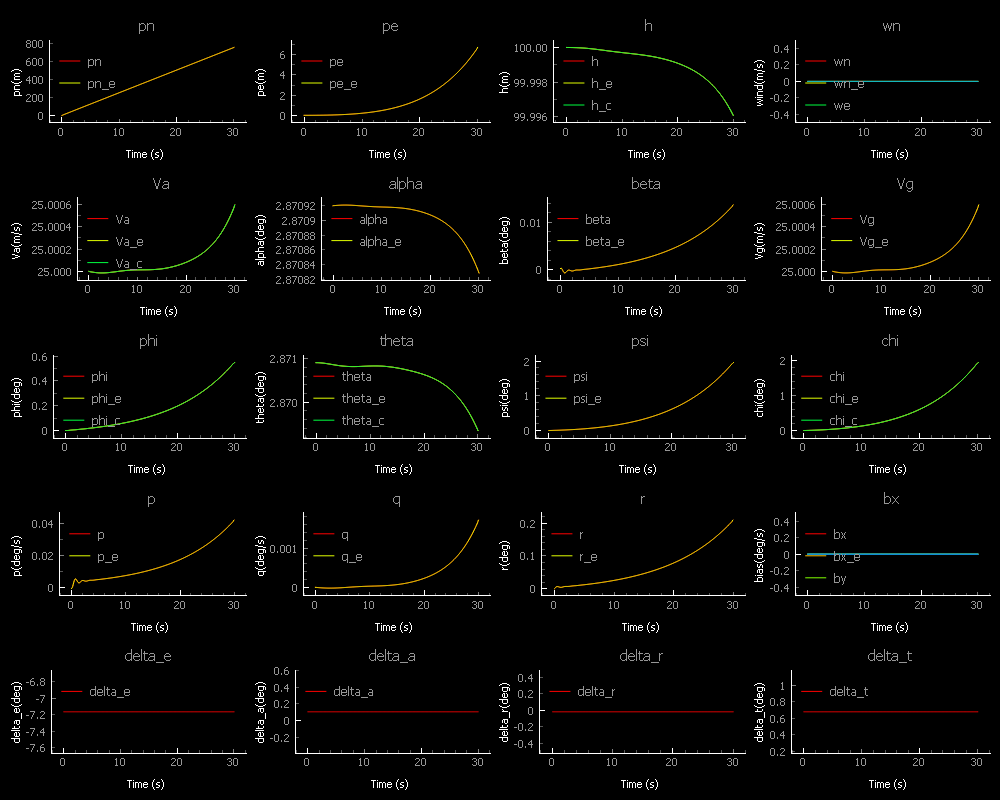

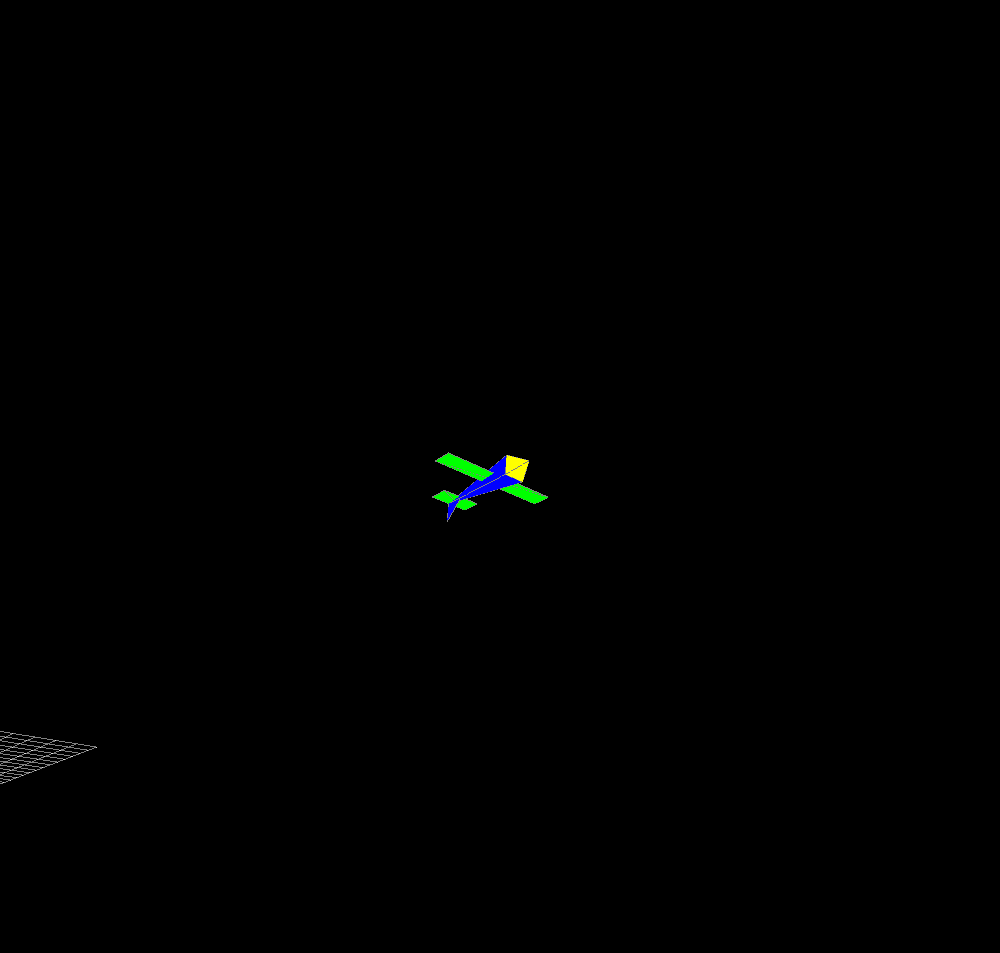

In [2]:
# Create the trim state
Va_trim = 25.
gamma_trim = 0.
trim_state, trim_input = compute_trim(state.convert_to_numpy(), Va_trim, gamma_trim)

# Display the trim state and input
print('trim_state = ')
display(trim_state)
print('trim input = ')
trim_input.print()

# Calculate the desired state dynamics
desired_trim_state_dot = np.array([[0., 0., -Va_trim*np.sin(gamma_trim), 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]).T

# Calculate the actual state dynamics
(Va, alpha, beta, _) = update_velocity_data(trim_state)
forces_moments_vec = forces_moments(trim_state, trim_input, Va, beta, alpha)
f = derivatives(trim_state, forces_moments_vec) 

# Display the difference
f_diff = f - desired_trim_state_dot
print("Difference between actual and desired (Note that pn and pe are not important):")
display(f_diff)

# Create a passthrough function for the trim input
pass_delta2 = lambda sim_time: trim_input
run_sim_and_display(pass_delta2, trim_state)

## Problem 3 - Trim Calculations
Repeate problem 2 with $V_a = 35 \frac{m}{s}$ and $\gamma = 5$ degrees


trim_state = 


c:\users\james\desktop\muav_soln\mavsim_python\mav_sim\chap4\mav_dynamics.py:276: RuntimeWarning: invalid value encountered in sqrt
  omega_p = (-b + np.sqrt(b**2 - 4*a*c)) / (2.*a)


array([[ 6.02992726e-15],
       [ 8.99133419e-15],
       [-1.00000000e+02],
       [ 3.49997521e+01],
       [ 0.00000000e+00],
       [ 1.31736009e-01],
       [ 9.98964369e-01],
       [ 0.00000000e+00],
       [ 4.54993455e-02],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00]])

trim input = 
elevator= 0.0032191083036186585 aileron= 0.0036861322475715223 rudder= -0.0006074726792592574 throttle= 1.0129284681927166
Difference between actual and desired (Note that pn and pe are not important):


array([[ 3.48668152e+01],
       [ 0.00000000e+00],
       [ 8.35656151e-06],
       [-2.79219192e-05],
       [ 6.25457642e-03],
       [-2.97221242e-07],
       [-0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-1.09493351e-04],
       [ 7.79608952e-07],
       [ 9.54707268e-04]])

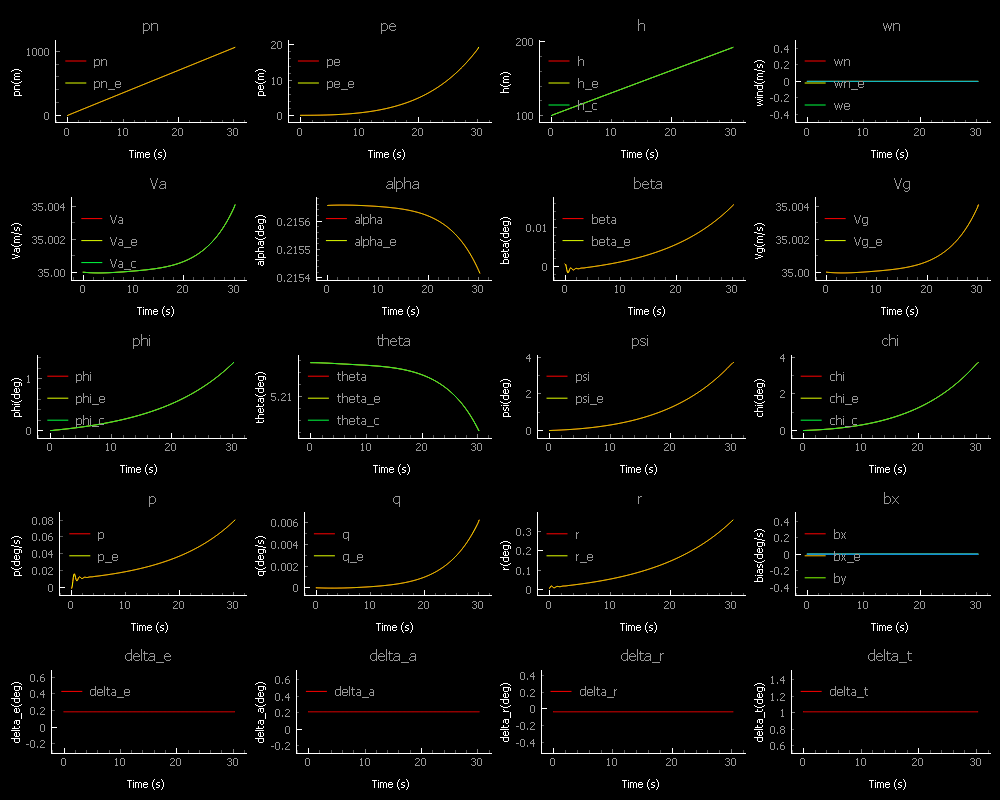

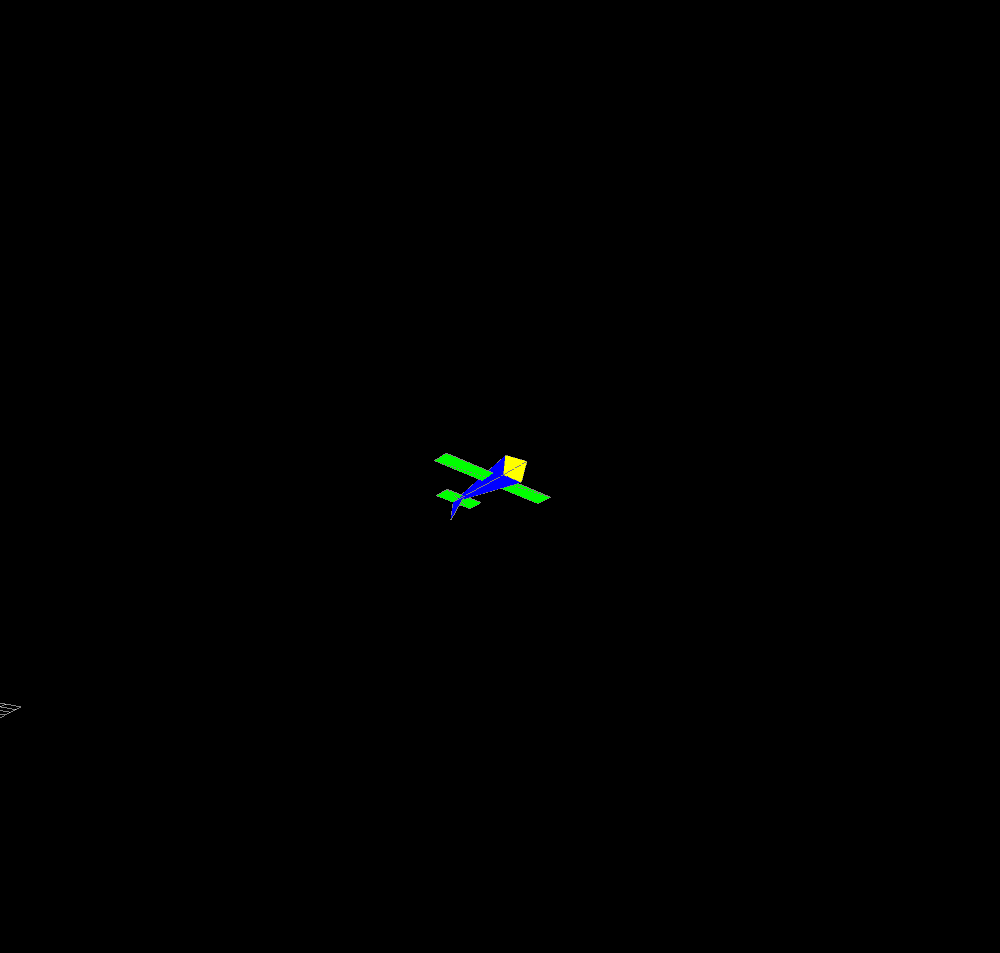

In [3]:
# Create the trim state
Va_trim = 35.
gamma_trim = 5*np.pi/180.
trim_state, trim_input = compute_trim(state.convert_to_numpy(), Va_trim, gamma_trim)

# Display the trim state and input
print('trim_state = ')
display(trim_state)
print('trim input = ')
trim_input.print()

# Calculate the desired state dynamics
desired_trim_state_dot = np.array([[0., 0., -Va_trim*np.sin(gamma_trim), 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]).T

# Calculate the actual state dynamics
(Va, alpha, beta, _) = update_velocity_data(trim_state)
forces_moments_vec = forces_moments(trim_state, trim_input, Va, beta, alpha)
f = derivatives(trim_state, forces_moments_vec) 

# Display the difference
f_diff = f - desired_trim_state_dot
print("Difference between actual and desired (Note that pn and pe are not important):")
display(f_diff)

# Create a passthrough function for the trim input
pass_delta2 = lambda sim_time: trim_input
run_sim_and_display(pass_delta2, trim_state)

## Problem 4 - Evaluate Eigenvalues of Longitudinal System
The `compute_ss_model(...)` function inside `chap5\compute_models.py` provides a numerical approximation for the models described in (5.44) and (5.51). 

For the trim trajectory corresponding to $V_a = 25 \frac{m}{s}$ and $\gamma = 0$, do the following:
* Calculate the eigenvalues of $A_{lon}$ and $A_{lat}$
* Answer the questions below

### Question: Which eigenvalue(s) correspond to the short-period mode?
Complex conjugate pair of eigenvalues of $A_{lon}$ with with the larger $\omega_n$ correspond to the short-period mode.

$\lambda = -4.87859821 \pm 9.86957041j$

### Question: Which eigenvalue(s) correspond to the phugoid mode?
Complex conjugate pair of eigenvalues of $A_{lon}$ with with the smaller $\omega_n$ correspond to the short-period mode.

$\lambda = -0.10413332 \pm 0.48908574j$

### Question: Which eigenvalue(s) corresponds to the spiral-divergence mode?
Corresponds to the real eigenvalue in the right half plane

$\lambda = 8.93941757e-02$

### Question: Which eigenvalue(s) corresponds to the roll mode?
Corresponds to the real eigenvalue in the left half plane

$\lambda = -2.24411598e+01$

### Question: Which eigenvalue(s) corresponds to the dutch-roll mode?
Correspond to the complex eigenvalues

$\lambda = -1.14075619e \pm 00+4.65506181j $


In [4]:
from mav_sim.chap5.compute_models import compute_ss_model

# Compute the trim state and input
Va_trim = 25.
gamma_trim = 0.
trim_state, trim_input = compute_trim(state.convert_to_numpy(), Va_trim, gamma_trim)

# Compute A_lon and A_lat
A_lon, B_lon, A_lat, B_lat = compute_ss_model(trim_state, trim_input)

# Compute the eigenvalues of A_lon for calculating short-period and phugoid modes
eig_A_lon, _ = np.linalg.eig(A_lon)
print("Eigenvalues of A_lon")
display(eig_A_lon)
print("Natural frequencies of A_lon")
w_n_lon = np.abs(eig_A_lon)
display(w_n_lon)

# Compute the eigenvalues of A_lat for calculating the spiral-divergence mode, roll mode, and dutch-roll mode
eig_A_lat, _ = np.linalg.eig(A_lat)
print("Eigenvalues of A_lat")
display(eig_A_lat)


Eigenvalues of A_lon


c:\users\james\desktop\muav_soln\mavsim_python\mav_sim\chap4\mav_dynamics.py:276: RuntimeWarning: invalid value encountered in sqrt
  omega_p = (-b + np.sqrt(b**2 - 4*a*c)) / (2.*a)


array([ 0.        +0.j        , -4.87859821+9.86957041j,
       -4.87859821-9.86957041j, -0.10413332+0.48908574j,
       -0.10413332-0.48908574j])

Natural frequencies of A_lon


array([ 0.        , 11.00950228, 11.00950228,  0.5000486 ,  0.5000486 ])

Eigenvalues of A_lat


array([  0.        +0.j        , -22.44115979+0.j        ,
         0.08939418+0.j        ,  -1.14075619+4.65506181j,
        -1.14075619-4.65506181j])

## Problem 5 - Phugoid mode
For the trim trajectory corresponding to $V_a = 25 \frac{m}{s}$ and $\gamma = 0$, use a doublet to excite the phugoid mode. Simulate the response. (Note that this problem is provided for you)

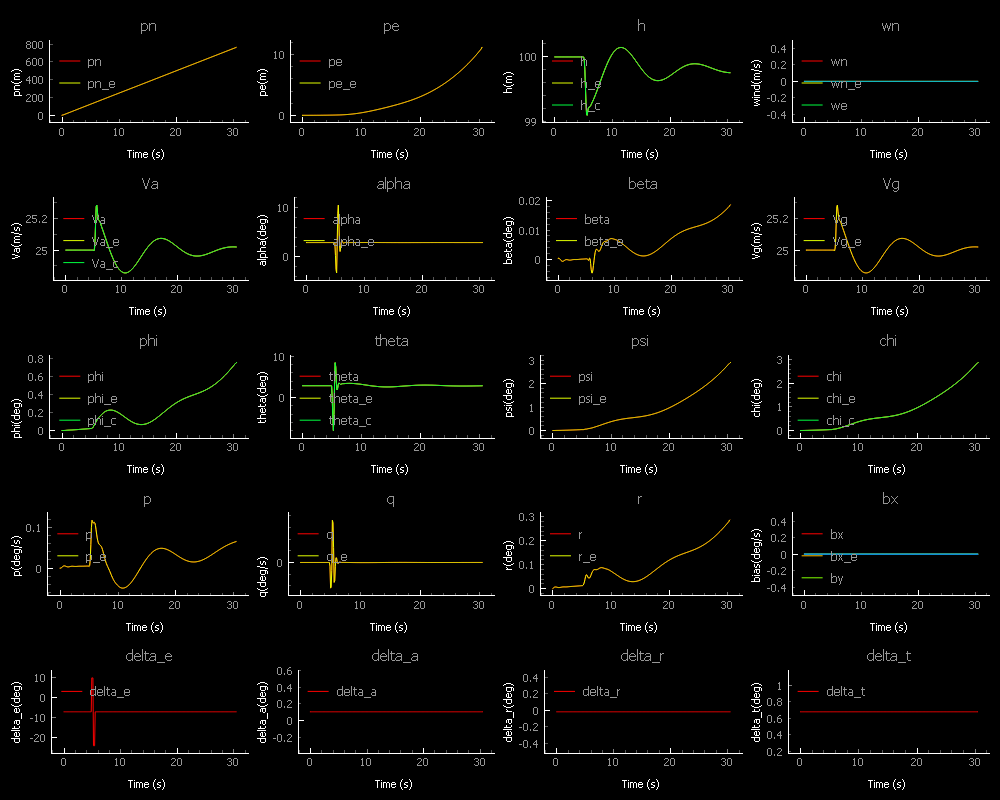

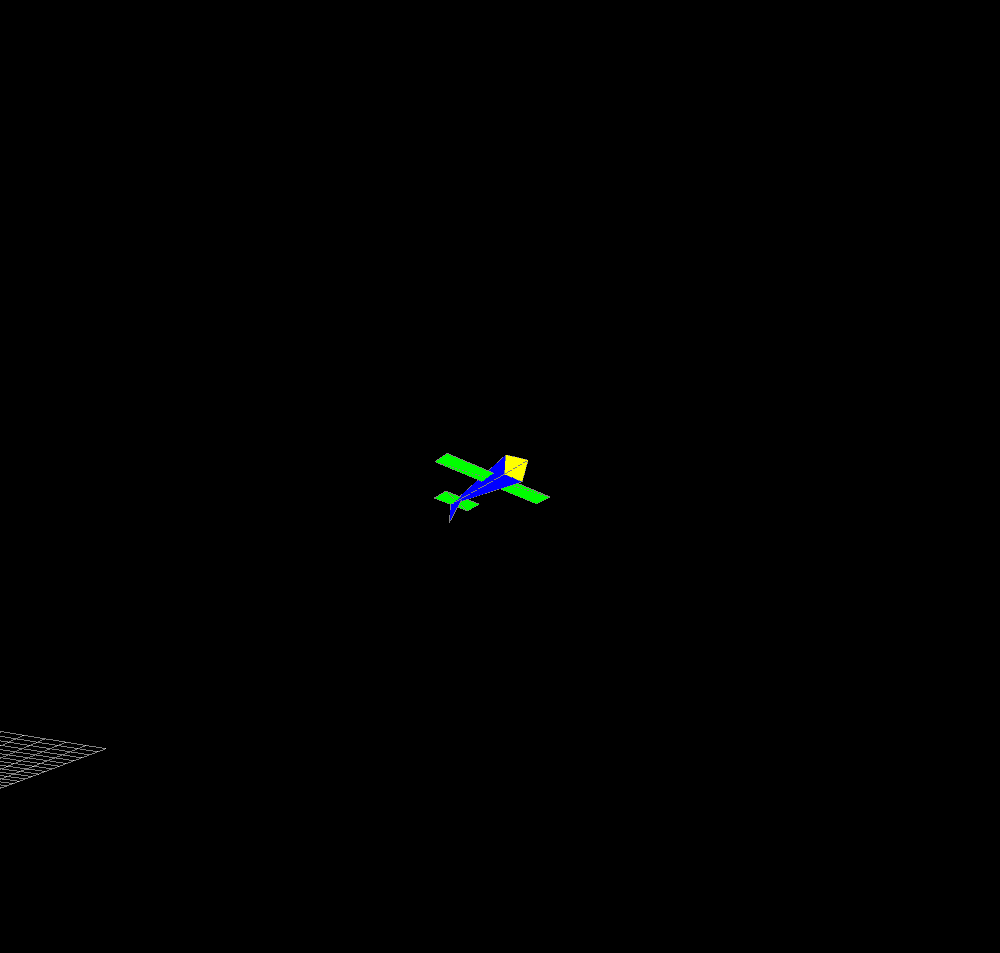

In [5]:
# Create the trim state
Va_trim = 25.
gamma_trim = 0.
trim_state, trim_input = compute_trim(state.convert_to_numpy(), Va_trim, gamma_trim)

# Create an input signal
input_signal = Signals(amplitude=0.3,
                    duration=0.3,
                    start_time=5.0)

# Create a function for exciting the phugoid mode
def excite_phugoid(sim_time: float):
    # copy the trim command
    delta_cmd = MsgDelta()
    delta_cmd.copy(trim_input)

    # Excite the phugoid mode
    delta_cmd.elevator += input_signal.doublet(sim_time)
    return delta_cmd

# Run the command
run_sim_and_display(excite_phugoid, trim_state)

## Problem 6 - Roll and spiral divergence modes
For the trim trajectory corresponding to $V_a = 25 \frac{m}{s}$ and $\gamma = 0$, use a doublet to excite the roll and spiral divergence modes.

c:\users\james\desktop\muav_soln\mavsim_python\mav_sim\chap4\mav_dynamics.py:276: RuntimeWarning: invalid value encountered in sqrt
  omega_p = (-b + np.sqrt(b**2 - 4*a*c)) / (2.*a)


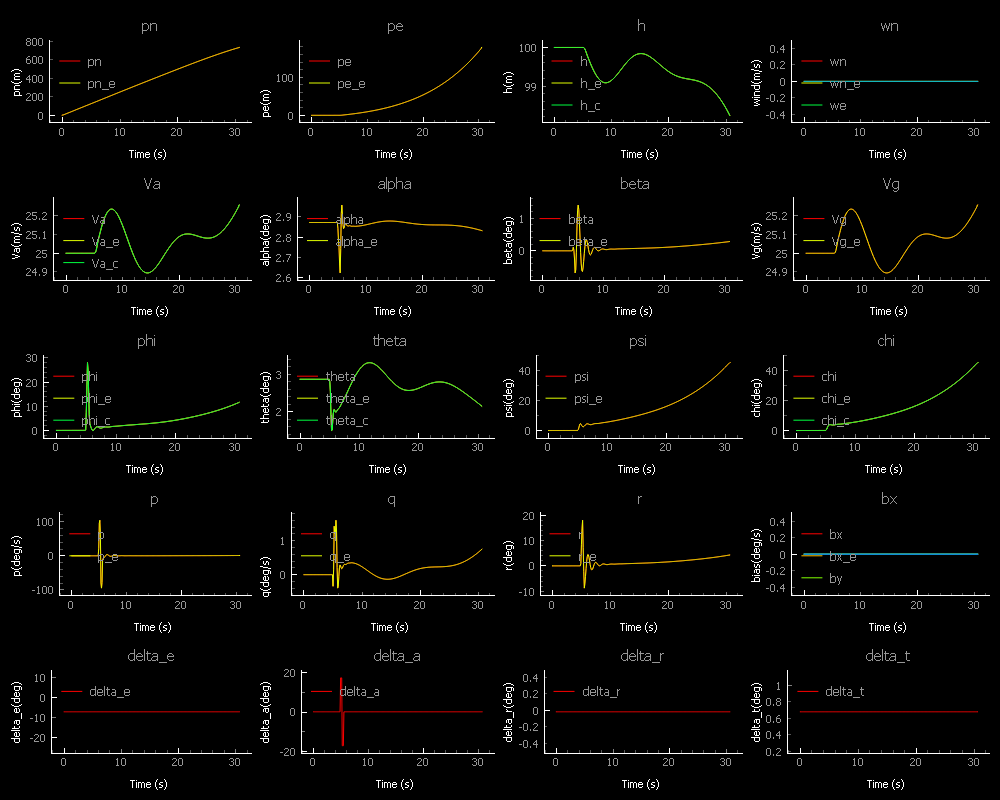

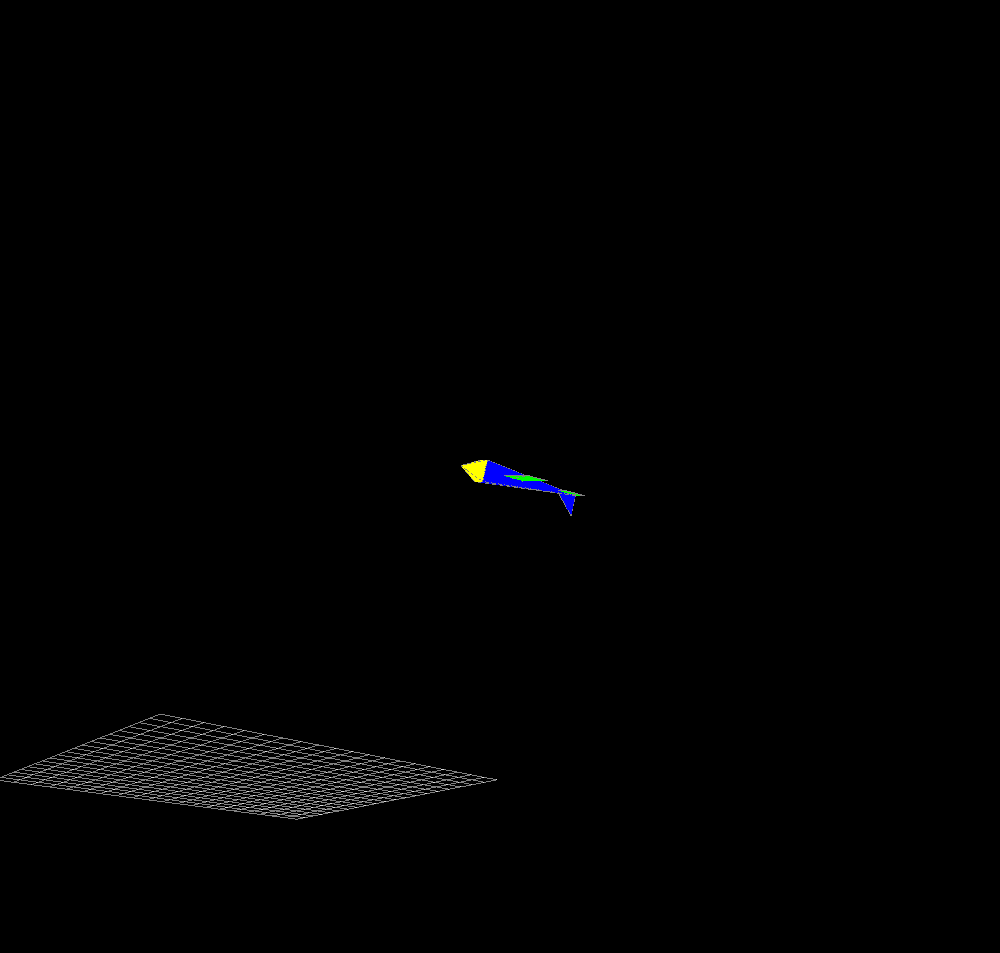

In [6]:
# Create the trim state
Va_trim = 25.
gamma_trim = 0.
trim_state, trim_input = compute_trim(state.convert_to_numpy(), Va_trim, gamma_trim)

# Create an input signal
input_signal = Signals(amplitude=0.3,
                    duration=0.3,
                    start_time=5.0)

# Create a function for exciting the phugoid mode
def excite_roll(sim_time: float):
    # copy the trim command
    delta_cmd = MsgDelta()
    delta_cmd.copy(trim_input)

    # Excite the phugoid mode
    delta_cmd.aileron += input_signal.doublet(sim_time)
    return delta_cmd

# Run the command
run_sim_and_display(excite_roll, trim_state)

## Problem 6 - Dutch roll mode
For the trim trajectory corresponding to $V_a = 25 \frac{m}{s}$ and $\gamma = 0$, use a doublet to excite the dutch roll mode.

c:\users\james\desktop\muav_soln\mavsim_python\mav_sim\chap4\mav_dynamics.py:276: RuntimeWarning: invalid value encountered in sqrt
  omega_p = (-b + np.sqrt(b**2 - 4*a*c)) / (2.*a)


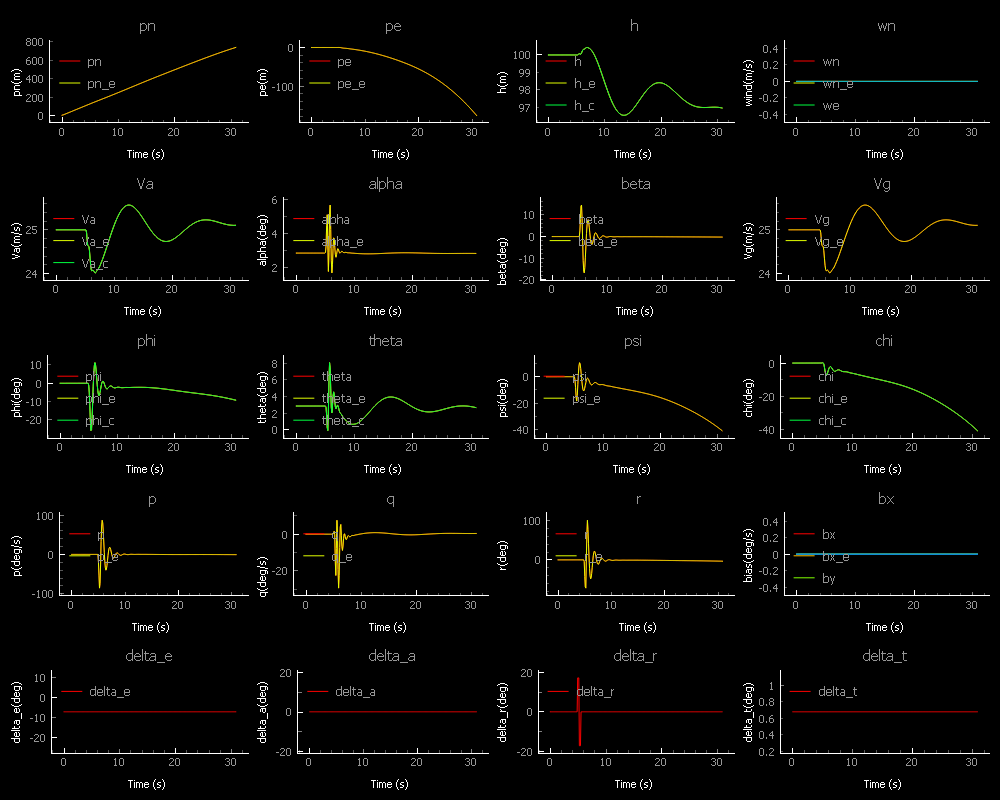

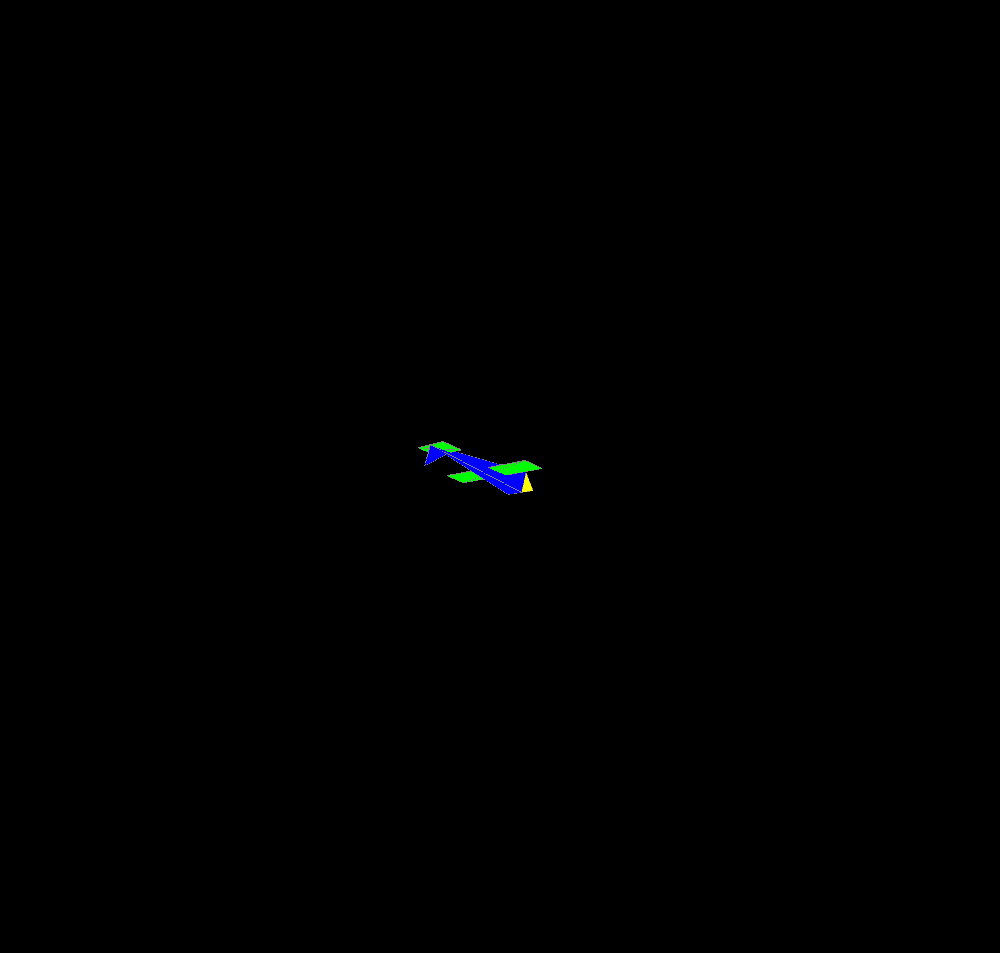

In [7]:
# Create the trim state
Va_trim = 25.
gamma_trim = 0.
trim_state, trim_input = compute_trim(state.convert_to_numpy(), Va_trim, gamma_trim)

# Create an input signal
input_signal = Signals(amplitude=0.3,
                    duration=0.3,
                    start_time=5.0)

# Create a function for exciting the phugoid mode
def excite_dutch_roll(sim_time: float):
    # copy the trim command
    delta_cmd = MsgDelta()
    delta_cmd.copy(trim_input)

    # Excite the phugoid mode
    delta_cmd.rudder += input_signal.doublet(sim_time)
    return delta_cmd

# Run the command
run_sim_and_display(excite_dutch_roll, trim_state)

## Simple code checking
The following code does not need to change. It should just be used as a sanity check so that you know the code is implemented properly. The output should not have any lines reading `Failed test!`

In [8]:
from mav_sim.unit_tests.ch5_dynamics_test import run_all_tests
run_all_tests()

Starting trim_objective_fun test

Calculated output:
1437901.491194673
Expected output:
1437901.491194673
Passed test
Calculated output:
29.780760107376643
Expected output:
29.780760107376643
Passed test
End of test

Starting compute_ss_model test

Testing A_lon
Calculated output:
[[ 2.90534196e-02 -2.03329066e-01 -7.71299394e-01 -9.65058225e+00
  -0.00000000e+00]
 [ 2.87667814e-01 -9.62708070e-02  9.64124243e-02 -5.67809402e-02
  -0.00000000e+00]
 [ 2.35224406e-01 -4.35155387e-01 -2.55906265e-01  0.00000000e+00
  -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  3.21948737e-02 -4.58935605e-05
  -0.00000000e+00]
 [ 1.74603175e-01 -3.17460317e-02 -0.00000000e+00  2.64492478e-01
   0.00000000e+00]]
Expected output:
[[ 2.90534196e-02 -2.03329066e-01 -7.71299394e-01 -9.65058225e+00
  -0.00000000e+00]
 [ 2.87667814e-01 -9.62708070e-02  9.64124243e-02 -5.67809402e-02
  -0.00000000e+00]
 [ 2.35224406e-01 -4.35155387e-01 -2.55906265e-01  0.00000000e+00
  -0.00000000e+00]
 [ 0.00000000e+00  0